# Imports

In [1]:
%matplotlib inline
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

sys.path.insert(0,os.path.abspath('..'))
from Scripts.methodChain import *

plt.rc("axes.spines", top=False, right=False)

# Cleaning up Data
We have created a script called methodChain that contains chained methods load_and_processText() as well as load_and_processSlang() which gets rid of uneccessary columns in our datasets. The cleaned up datasets are then loaded into df - list of text inputs - and dfSlang - list of abbreviations and the corresponding keys.

In [2]:
df = load_and_processText()
dfSlang = load_and_processSlang()

# Implementation of Pseudocode Naive Algorithm
We've created a function called implementation which takes a text input, finds all abbreviations and replace them with the corresponding key.

In [3]:
def implementation(tweet):
    found = 0
    tweet.lower()
    for index, row in dfSlang.iterrows():
        try:
            found= tweet.index(row['Column1']) 
        except (ValueError, TypeError):
            found=-1
        if found>-1:
            punct = [""," ",".", ",","!","?"]
            if found == 0 or tweet[(found-1):found] in punct:
                tweet = tweet.replace(row['Column1'], row['Column2'])
    return tweet

# Test case and output (Naive Algorithm)
Here is a sample text input with some abbreviations that we've tested with our implementation function.

In [4]:
sample = "we're still meeting at 8pm afaik. if anything changes i'll send you the deets. cu l8r and tc."
implementation(sample)


"we're still meeting at 8pm as far as I know. if anything changes i'll send you the details. see you later and take care."

In [5]:
sample2 = "i think we r lost, this is not the wtg"
implementation(sample2)


'i think we are lost, this is not the way to go'

In [6]:
sample3 = "thx for coming to my b-day 2nite, will 4ward the pics to u"
implementation(sample3)

'thanks for coming to my birthday tonight, will forward the pics to you'

# Plots of different input sizes (Naive Algorithm)


In [7]:
from tryItABunch import tryItABunch
nValuesNaive, tValuesNaive = tryItABunch(implementation, startN = 148, endN = 25000, stepSize=74, numTrials=5)

Text(0.5, 1.0, 'Original Naive algorithm')

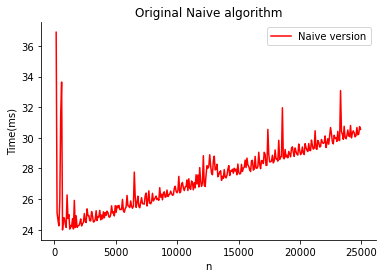

In [8]:
plt.plot(nValuesNaive, tValuesNaive,color="red", label="Naive version")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Original Naive algorithm")

In [9]:
from tryItABunch2 import tryItABunch2
nValuesNaive2, tValuesNaive2 = tryItABunch2(numTrials=20)

Text(0.5, 1.0, 'Naive algorithm verus O(m+n^2)')

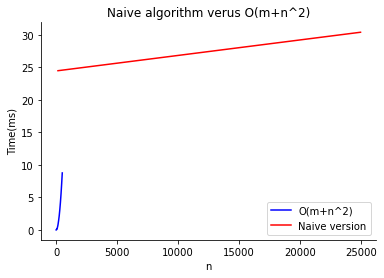

In [10]:
m, b = np.polyfit(nValuesNaive, tValuesNaive, 1)
nValuesNaiveNP = np.array(nValuesNaive)
plt.plot(nValuesNaive2, tValuesNaive2,color="blue", label="O(m+n^2)")
plt.plot(nValuesNaive, m*nValuesNaiveNP+ b,color="red", label="Naive version")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Naive algorithm verus O(m+n^2)")